In [1]:
import pandas as pd

dados = pd.read_csv(r'C:\Users\Gabriel\Desktop\Programação\Alura\Data Science\Clustering - extraindo padroes\CC GENERAL.csv')
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
dados = dados.drop(columns=['CUST_ID', 'TENURE'])
dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [3]:
dados.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [4]:
dados.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [5]:
dados = dados.fillna(dados.median())
dados.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [6]:
from sklearn.preprocessing import Normalizer

values =  Normalizer().fit_transform(dados.values)

In [7]:
from sklearn.cluster import KMeans
import numpy as np

SEED = 1224
np.random.seed(SEED)

# verbose mostra como está sendo realizado o modelo
kmeans = KMeans(n_clusters=5, verbose=False, n_init=10, max_iter=300)

# projection = x, y
kmeans.fit(values)
y_pred = kmeans.predict(values)

In [8]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
silhouette = silhouette_score(values, labels, metric='euclidean')
silhouette

0.36454314826693845

In [9]:
from sklearn.metrics import davies_bouldin_score

dbe = davies_bouldin_score(values, labels)
dbe

1.075812734747931

In [10]:
from sklearn.metrics import calinski_harabasz_score

calinski = calinski_harabasz_score(values, labels)
calinski

3431.8005407346513

In [11]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = silhouette_score(dataset, labels, metric='euclidean')
    dbs = davies_bouldin_score(dataset, labels)
    calinski = calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [13]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [14]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36450360640080837 1.075784077836666 3431.794260865586


In [15]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3502512978283904 1.1210416316050558 3018.987286493307


In [16]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.27226968277940916 1.2259935914228601 2404.2093294917104


In [17]:
dados.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [20]:
import numpy as np

random_data = np.random.rand(8950, 16)
display(clustering_algorithm(5 ,random_data))
display(s2, dbs2, calinski2)

(0.039987321223271734, 3.4429910161414496, 304.2377151840141)

0.36450360640080837

1.075784077836666

3431.794260865586

In [21]:
set_1, set_2, set_3 = np.array_split(values, 3)
display(clustering_algorithm(5 ,set_1))
display(clustering_algorithm(5 ,set_2))
display(clustering_algorithm(5 ,set_3))


(0.36899540188288277, 1.0554645548496848, 1204.1163168356172)

(0.35406999696241026, 1.1389554530299946, 1194.945411949724)

(0.3617903683784798, 1.1524376971638408, 1159.0068187799504)

Text(0, 0.5, 'Valor total gasto')

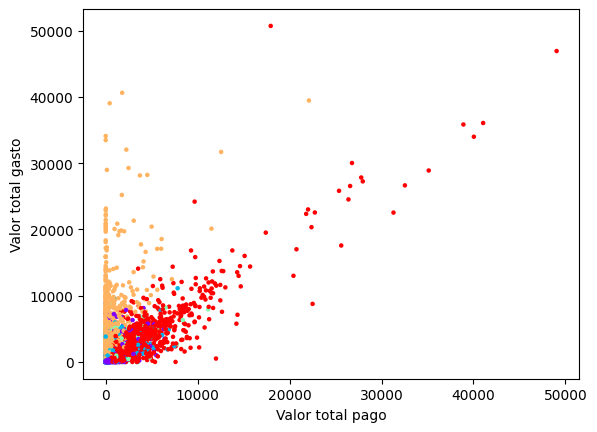

In [23]:
import matplotlib.pyplot as plt

plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

In [25]:
dados['cluster'] = labels

dados.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2         411.0  1987.501586  1854.459156  70.794108  1018.958891   
3        1073.0  1795.328292  1982.485775   0.000000   507.076999   
4        1537.0  1142.320861  1664.363459   0.000000   212.282538   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2        1337.287314  2138.678431  11670.179850             411.0  0.989486   
3        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
4         555.131027  1370.317105  19043.138560            1537.0  0.928267   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.733727   4483.503862           3280.0  0.246806   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...      7112.618584  76406.207520            411.0  0.019318   
3        ...       884.183626  21235.065300           1073.0  0.117430   
4        ...       523.893953  18621.013310           1537.0  0.278150   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346748  0.0  0.0  0.000000  0.444444  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.090901  0.0  0.0  0.000000  0.000000  1.0  
3        0.186772  0.0  0.0  0.083333  0.142857  1.0  
4        0.367086  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [26]:
centroids = kmeans.cluster_centers_

In [35]:
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [39]:
description = dados.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
description.mean()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12956\1258407238.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dados.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
cluster,,,,,
0,443.746756,629.249107,141.482978,5130.547795,814.294226
1,3037.962543,385.248630,1636.917210,4495.771989,968.890376
2,1987.501586,854.865815,421.129352,2227.737226,1336.238911
3,1795.328292,476.810531,3267.199032,3982.452201,4713.384730
4,1142.320861,3273.425517,183.376625,4097.306540,3036.763695
